# 🎭 Sentiment Analysis on IMDB Movie Reviews

In this project, I collected IMDB movie reviews using web scraping. I processed the reviews, performed sentiment analysis using **VADER** and machine learning models, and evaluated the results based on precision, recall, and F1 score.

## 📌 Tasks:
- **Data Collection**: Scraped reviews and ratings of assigned movies.
- **Sentiment Analysis**: Applied **VADER** and machine learning for sentiment classification (positive/negative).
- **Evaluation**: Compared model performance using accuracy, precision, recall, and F1 score.

## 📊 Key Insights:
- VADER and machine learning showed different results for sentiment classification.
- Misclassifications typically occurred in reviews with subtle sentiments or sarcasm.


# **Data Collection**

**Importing libraries.**

**BeautifulSoup (bs4)**: It loads the given webpage in its HTML form. We can then inspect and search for the
data of interest and its pattern, and extract the required data from the elements through their HTML tag.


**Request**: **Request** loads the requested page, after which elements can be extracted from the page.


In [ ]:
import csv
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
time.sleep(2)
import warnings
warnings.filterwarnings('ignore')

Links to the webpages to get the data (reviews and rating) from. These links are for the demo purpose, you should be using links that are associated to the move names assigned to you.

In [ ]:
urls = []
url1 = 'https://www.imdb.com/title/tt0108052/reviews?ref_=tt_urv' # Schindler's List
url2 = 'https://www.imdb.com/title/tt0317676/reviews?ref_=tt_urv'# House of the Dead
url3 = 'https://www.imdb.com/title/tt12573454/reviews?ref_=tt_urv' # Sharper (2023)
url4 = 'https://www.imdb.com/title/tt7466810/reviews?ref_=tt_urv' # 777 Charlie
url5 = 'https://www.imdb.com/title/tt0036775/reviews?ref_=tt_urv' # Double Indemnity
url6 = 'https://www.imdb.com/title/tt10365998/reviews?ref_=tt_urv' # Infinity Pool (2023)
url7 = 'https://www.imdb.com/title/tt0405508/reviews?ref_=tt_urv' # Rang de Basanti


In [ ]:
urls.append(url1)
urls.append(url2)
urls.append(url3)
urls.append(url4)
urls.append(url5)
urls.append(url6)
urls.append(url7)


In [ ]:
content = []
for url in urls:
 page = requests.get(url, timeout=2.50)
 page_content = page.content
 soup = BeautifulSoup(page_content, 'html.parser')
 content.append(soup.find_all('div', class_= 'review-container'))

In [ ]:
# Now, inspect the web page using 'Inspect' tool. Right click the web page and select 'Inspect', use 'Elements'
# tab. We are looking for a pattern, to get the reviews and ratings. Place the cursor and it will highlight the data
# on the web page like 'I am here' marker. In this case, we can see that the following tags contain the
# information we are after, which are rating and review.



In [ ]:
## <div class = "lister-item-content"> or <div class = "review-container">


Print 'content' to inspect what it contains.
Similarly, using 'Inspect' tool, we can see that we are also interested in:


In [ ]:
##<span></span>, <span class="point-scale">, <a class="title">


In [ ]:
print(content)

[[<div class="review-container">
<div class="lister-item-content">
<a class="title" href="/review/rw2143371/"> A three hour film that feels too short
</a> <div class="display-name-date">
<span class="display-name-link"><a href="/user/ur0035842/">Gordon-11</a></span><span class="review-date">19 October 2009</span>
</div>
<div class="content">
<div class="text show-more__control">This film tells the story of Nazi officer Oskar Schindler, who secretly saved hundreds of Jewish people from concentration camps.<br/><br/>I have wanted to watch "Schindler's List" for years, but could not bring myself to do so because I don't want to be disappointed. "Schindler's List" is phenomenally powerful and effective in portraying the historical atrocities. I believe no one can keep their eyes dry from Schindler's List". The scene involving mothers running after trucks of children is particularly memorable. The final farewell scene is very emotional for me. It is rare achievement, but "Schindler's List" 

Now, as we now our data structure, let's define a dataframe say 'movie' that has two columns 'Review' and
'Rating' to store user review and user rating.

Define a dataframe called 'movie' to store movie reviews and the ratings. For a review, if the rating is not
given, we ignore that review.

In [ ]:
movie = pd.DataFrame(columns=['Review','Rating'])

In [ ]:
review = []
rating = []
count = 0
for cc in content:
  for c in cc:
    count+= 1

    print('\nMovie review ', count)
    #Get review.
    str = c.find_all('a', attrs={'class':'title'})
    rReview =''
    for s in str:
      #print('Review is: ',s.get_text())
      rReview = s.get_text()

    #Get rating.
    ratings = c.find_all('span', attrs={'class':''})
    rVal = []
    for r in ratings:
      str1 = r.get_text().strip()
      rVal.append(str1)

    val = rVal[0]
    if(len(val) > 2):
      continue
    else:
      review.append(rReview)
      rating.append(val)
      print('Review: ', rReview)
      print('Rating: ',val)

movie['Review'] = review
movie['Rating'] = rating


Movie review  1

Movie review  2
Review:   Awesome

Rating:  10

Movie review  3
Review:   Bring me the heads of Hitler, Himmler, Eichmann n Mengele.

Rating:  10

Movie review  4
Review:   What he hell is wrong with the people that commented on the 1st 4 pages of reviews???

Rating:  9

Movie review  5
Review:   Whoever saves one life, saves the world entirely. ⭐

Rating:  10

Movie review  6

Movie review  7

Movie review  8
Review:   You don't have to be Jewish to be touched by this response to inhumanity.

Rating:  10

Movie review  9
Review:   Spielberg's most important work

Rating:  10

Movie review  10
Review:   Stunning - Spielberg's Greatest Film & Top 💯 All Time Best

Rating:  10

Movie review  11
Review:   Profound Beauty! If you appreciate art, this is a masterpiece.

Rating:  9

Movie review  12
Review:   Based on a true story

Rating:  9

Movie review  13
Review:   One of the best movies ever made.

Rating:  10

Movie review  14
Review:   Incredibly moving and visually 

In [ ]:
movie.head()


,Review,Rating
0,Awesome\n,10
1,"Bring me the heads of Hitler, Himmler, Eichma...",10
2,What he hell is wrong with the people that co...,9
3,"Whoever saves one life, saves the world entir...",10
4,You don't have to be Jewish to be touched by ...,10


In [ ]:
movie.tail()

,Review,Rating
159,Good message. Stupid film.\n,6
160,Worst movie of 2006\n,1
161,Your Stereotypical Movie About Patriotism\n,3
162,Incredible!\n,10
163,Horribly Overrated\n,5


In [ ]:
movie.shape


(164, 2)

In [ ]:
movie["Review"] = movie["Review"].apply(lambda x: x.replace('\n',''))

In [ ]:
movie.to_csv('IMDB_reviews.csv', index=False)

# **Text Processing and Analysis**

In [ ]:
import string
import re
#import nltk
#nltk.download()
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split


In [ ]:
textFeatures = movie['Review'].copy()
textFeatures.shape

(164,)

In [ ]:
#Preparing text for Wordcloud
text = []
for t in textFeatures:
 text.append(t)
all_text = ', '.join(t for t in text)
#print(all_text)
print(len(all_text))


6439


4857

In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


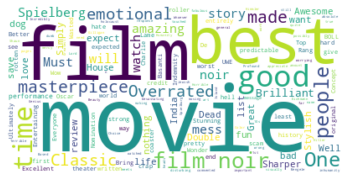

In [ ]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["br", "im", "thats"]) #"im","lol","Xa","film"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text)
# Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#save the generated image to a file
#wordcloud.to_file("wordcloud_cb_all.png")

# **Sentiment Identification using VADER**

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sid = SentimentIntensityAnalyzer()
c = 0
pos=0
neg=0
neu=0
for t in text:
  c+=1
  print(c, t)
  ss = sid.polarity_scores(t)
  print(ss)

  if(ss['compound'] >= 0.05):
    print('positive')
    pos+=1
  elif(ss['compound'] <= -0.05):
    print('negative')
    neg+=1
  else:
    print('neutral')
    neu+=1
  print('\n')

1  Awesome
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249}
positive


2  Bring me the heads of Hitler, Himmler, Eichmann n Mengele.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


3  What he hell is wrong with the people that commented on the 1st 4 pages of reviews???
{'neg': 0.371, 'neu': 0.629, 'pos': 0.0, 'compound': -0.8496}
negative


4  Whoever saves one life, saves the world entirely. ⭐
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


5  You don't have to be Jewish to be touched by this response to inhumanity.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


6  Spielberg's most important work
{'neg': 0.0, 'neu': 0.589, 'pos': 0.411, 'compound': 0.2716}
positive


7  Stunning - Spielberg's Greatest Film & Top 💯 All Time Best
{'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'compound': 0.9153}
positive


8  Profound Beauty! If you appreciate art, this is a masterpiece.
{'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.8977}
posit

In [ ]:
print(pos,neg,neu)

70 43 51


In [ ]:
# rating is a very strong measure for sentiment as compared to using a tool like vader. Reason: Rating is empirical and tool is going to generate the sentiment based on a lexicon.
"""
limitations of the tool:
1. good at understanding negative sentiments
2. but not so good at differentiating between positive and neutrals

"""

'\nlimitations of the tool:\n1. good at understanding negative sentiments\n2. but not so good at differentiating between positive and neutrals\n\n'

# **Sentiment Classification using Machine Learning**


**Prepare 'Truth Set'**

We will be using 'User Rating' as a truth set to evaluate the results. To prepare 'Truth Set', we'll define three classes - 'positive', 'negative', and 'netural'. On the scale of 0 to 10, consider review being 'positvie' if the rating is from 6 to 10, 'negative' if the rating is from 0 to 4, 'netural' if rating is 5. We add this information in a
new column called 'class-label'.


In [ ]:
label = []
for r in movie['Rating']:
  r = int(r)
  if (r>5):
    label.append('1') #Positive
  elif(r<5):
    label.append('-1') #Negative
  elif(r==5):
    label.append('0') #Netural
movie['class-label'] = label


In [ ]:
movie['class-label'].value_counts()


1     105
-1     46
0      13
Name: class-label, dtype: int64



In this notebook, we'll work on binary classification, where only two classes are considered 'positive (1)' and
'negative (-1)'. Ignore 'neutral (0)' class. However, the code in this notebook is adopted for multiclass
classification problem.

In [ ]:
movie = movie[movie['class-label']!='0']


In [ ]:
movie['class-label'].value_counts()


1     105
-1     46
Name: class-label, dtype: int64

In [ ]:
textFeatures = movie['Review'].copy()
textFeatures.shape

(151,)

In [ ]:
import nltk
nltk.download('punkt')
# Stemming using TextBlob library for stemming
from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def textblob_tokenizer(input_str):
 blob = TextBlob(input_str.lower())
 tokens = blob.words
 words = [token.stem() for token in tokens]
 return words


In [ ]:
#Toy example:
print(textblob_tokenizer('Q: studed studing!!! I miss uuuu! It&#039;s'))


['q', 'stude', 'stude', 'i', 'miss', 'uuuu', 'it', '039', 's']


The above Toy example demonstrates that TextBlob() function has converted given sentence into tokens or
words, converted upper case letters to lower case, and removed wild characters.




 to identify which characters have been removed. I tried to identify what is the lenght of the output. To do so, i was required to store output to a list and print the length of the list using a len() function.


Transforming text dataset into two matrix representations.


In [ ]:
#countvectorizer convers each review into a vector based on the word count.
countvectorizer = CountVectorizer(analyzer= 'word', stop_words= 'english',
 tokenizer=textblob_tokenizer)
#convers text into a vector based on tf-idf weighting scheme.
tfidfvectorizer = TfidfVectorizer(analyzer= 'word', stop_words= 'english',
 tokenizer=textblob_tokenizer)

In [ ]:
textFeatures

0                                                Awesome
1       Bring me the heads of Hitler, Himmler, Eichma...
2       What he hell is wrong with the people that co...
3       Whoever saves one life, saves the world entir...
4       You don't have to be Jewish to be touched by ...
                             ...                        
158     None of the 2-hour-45minute is wasted in this...
159                           Good message. Stupid film.
160                                  Worst movie of 2006
161            Your Stereotypical Movie About Patriotism
162                                          Incredible!
Name: Review, Length: 151, dtype: object

In [ ]:
count_matrix = countvectorizer.fit_transform(textFeatures)
tfidf_matrix = tfidfvectorizer.fit_transform(textFeatures)

In [ ]:
print(tfidf_matrix) #print elements of the matrix.


  (0, 38)	1.0
  (1, 205)	0.3819782760963644
  (1, 216)	0.3819782760963644
  (1, 110)	0.3819782760963644
  (1, 154)	0.3819782760963644
  (1, 157)	0.3819782760963644
  (1, 148)	0.3819782760963644
  (1, 57)	0.3529243255185132
  (2, 259)	0.32207294933464997
  (2, 230)	0.3702109135852398
  (2, 10)	0.3702109135852398
  (2, 6)	0.3702109135852398
  (2, 76)	0.3702109135852398
  (2, 232)	0.3065759862117016
  (2, 358)	0.3702109135852398
  (2, 151)	0.34205200963758914
  (3, 366)	0.38127908653712833
  (3, 114)	0.3522783175671586
  (3, 352)	0.3522783175671586
  (3, 187)	0.33170194452509016
  (3, 265)	0.7045566351343172
  (4, 173)	0.44400466996355376
  (4, 258)	0.44400466996355376
  (4, 313)	0.3099522040979942
  (4, 319)	0.44400466996355376
  :	:
  (144, 22)	0.4286432773600676
  (144, 31)	0.4286432773600676
  (144, 33)	0.4286432773600676
  (144, 21)	0.3549645098709971
  (144, 38)	0.37290744136866405
  (145, 208)	0.5199181094011236
  (145, 210)	0.5627195655854683
  (145, 136)	0.48954999295204643
  (14

In [ ]:
# Print the dimensions of the tfidf_matrix, x rows (number of reviews) and y columns (total words occur in the
# entire dataset.)

In [ ]:
print(tfidf_matrix.shape)
print(count_matrix.shape)


(151, 369)
(151, 369)


In [ ]:
# tfidf_matrix.toarray()

Above numbers show dimension of count_matrix, there are X rows (102 reviews), and Y columns (274 wordfeatures) in the transformed dataset. Shape will be different on your dataset

# **Build ML models**

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(
 tfidf_matrix, movie['class-label'], test_size=0.3,random_state=8)
print(features_train.shape, features_test.shape, labels_train.shape, labels_test.shape)

(105, 369) (46, 369) (105,) (46,)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
#SVM classifier
from sklearn.svm import SVC
print("\nEvaluation for SVM \n")
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(features_train, labels_train)
prediction = svc.predict(features_test)
acc = accuracy_score(labels_test,prediction)
print('Accuracy:', acc)
from sklearn.metrics import precision_score
prec = precision_score(labels_test,prediction, average='weighted')
print('Precision:', prec)
from sklearn.metrics import recall_score
recall = recall_score(labels_test,prediction, average='weighted')
print('Recall:', recall)
from sklearn.metrics import f1_score
f1 = f1_score(labels_test,prediction, average='weighted')
print('F-1 measure: ', f1)
print('\nConfusion Matrix:\n')
print(confusion_matrix(labels_test, prediction))
print(classification_report(labels_test, prediction))
#print(prediction)


Evaluation for SVM 

Accuracy: 0.717391304347826
Precision: 0.7990338164251208
Recall: 0.717391304347826
F-1 measure:  0.6187841144362883

Confusion Matrix:

[[ 1 13]
 [ 0 32]]
              precision    recall  f1-score   support

          -1       1.00      0.07      0.13        14
           1       0.71      1.00      0.83        32

    accuracy                           0.72        46
   macro avg       0.86      0.54      0.48        46
weighted avg       0.80      0.72      0.62        46



In [ ]:
#Decision Tree
print("\nEvaluation for Decision Tree \n")
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=45)
dtree.fit(features_train, labels_train)
prediction = dtree.predict(features_test)
acc = accuracy_score(labels_test,prediction)
print('Accuracy: ', acc)
prec = precision_score(labels_test,prediction, average='weighted')
print('Precision: ', prec)
recall = recall_score(labels_test,prediction, average='weighted')
print('Recall: ', recall)
f1 = f1_score(labels_test,prediction, average='weighted')
print('F-1 measure: ',f1)
print('\nConfusion Matrix:\n')
print(confusion_matrix(labels_test, prediction))
print(classification_report(labels_test, prediction))


Evaluation for Decision Tree 

Accuracy:  0.717391304347826
Precision:  0.6911928651059086
Recall:  0.717391304347826
F-1 measure:  0.6842212696468667

Confusion Matrix:

[[ 4 10]
 [ 3 29]]
              precision    recall  f1-score   support

          -1       0.57      0.29      0.38        14
           1       0.74      0.91      0.82        32

    accuracy                           0.72        46
   macro avg       0.66      0.60      0.60        46
weighted avg       0.69      0.72      0.68        46



### Wordcloud for positive reviews

In [ ]:
positivetextFeatures = movie[movie["class-label"]=='1']["Review"].copy()
positivetextFeatures.shape

(105,)

In [ ]:
#Preparing text for Wordcloud
text = []
for t in positivetextFeatures:
 text.append(t)
positive_text = ', '.join(t for t in text)
#print(all_text)
print(len(positive_text))


4302


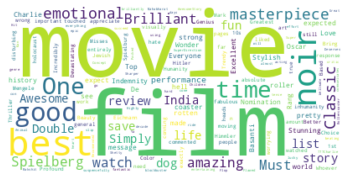

In [ ]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["br", "im", "thats"]) #"im","lol","Xa","film"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive_text)
# Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#save the generated image to a file
#wordcloud.to_file("wordcloud_cb_all.png")

### Wordcloud for negative reviews

In [ ]:
negativetextFeatures = movie[movie["class-label"]=='-1']["Review"].copy()
negativetextFeatures.shape

(46,)

In [ ]:
#Preparing text for Wordcloud
text = []
for t in negativetextFeatures:
 text.append(t)
negative_text = ', '.join(t for t in text)
#print(all_text)
print(len(negative_text))


1688


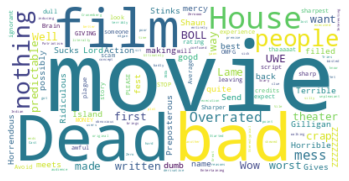

In [ ]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["br", "im", "thats"]) #"im","lol","Xa","film"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative_text)
# Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#save the generated image to a file
#wordcloud.to_file("wordcloud_cb_all.png")

### Using BoW Scheme

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(
 count_matrix, movie['class-label'], test_size=0.3,random_state=8)
print(features_train.shape, features_test.shape, labels_train.shape, labels_test.shape)

(105, 369) (46, 369) (105,) (46,)


In [ ]:
#SVM classifier
from sklearn.svm import SVC
print("\nEvaluation for SVM \n")
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(features_train, labels_train)
prediction = svc.predict(features_test)
acc = accuracy_score(labels_test,prediction)
print('Accuracy:', acc)
from sklearn.metrics import precision_score
prec = precision_score(labels_test,prediction, average='weighted')
print('Precision:', prec)
from sklearn.metrics import recall_score
recall = recall_score(labels_test,prediction, average='weighted')
print('Recall:', recall)
from sklearn.metrics import f1_score
f1 = f1_score(labels_test,prediction, average='weighted')
print('F-1 measure: ', f1)
print('\nConfusion Matrix:\n')
print(confusion_matrix(labels_test, prediction))
print(classification_report(labels_test, prediction))
#print(prediction)


Evaluation for SVM 

Accuracy: 0.717391304347826
Precision: 0.6955216085650868
Recall: 0.717391304347826
F-1 measure:  0.696912413358538

Confusion Matrix:

[[ 5  9]
 [ 4 28]]
              precision    recall  f1-score   support

          -1       0.56      0.36      0.43        14
           1       0.76      0.88      0.81        32

    accuracy                           0.72        46
   macro avg       0.66      0.62      0.62        46
weighted avg       0.70      0.72      0.70        46



In [ ]:
#Decision Tree
print("\nEvaluation for Decision Tree \n")
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=45)
dtree.fit(features_train, labels_train)
prediction = dtree.predict(features_test)
acc = accuracy_score(labels_test,prediction)
print('Accuracy: ', acc)
prec = precision_score(labels_test,prediction, average='weighted')
print('Precision: ', prec)
recall = recall_score(labels_test,prediction, average='weighted')
print('Recall: ', recall)
f1 = f1_score(labels_test,prediction, average='weighted')
print('F-1 measure: ',f1)
print('\nConfusion Matrix:\n')
print(confusion_matrix(labels_test, prediction))
print(classification_report(labels_test, prediction))


Evaluation for Decision Tree 

Accuracy:  0.782608695652174
Precision:  0.7927536231884058
Recall:  0.782608695652174
F-1 measure:  0.751207729468599

Confusion Matrix:

[[ 5  9]
 [ 1 31]]
              precision    recall  f1-score   support

          -1       0.83      0.36      0.50        14
           1       0.78      0.97      0.86        32

    accuracy                           0.78        46
   macro avg       0.80      0.66      0.68        46
weighted avg       0.79      0.78      0.75        46



# **Report Write a summary on the evaluation performed and the interpretation of the results.**



###  Model Evaluation

The evaluation was performed using the **Bag of Words (BoW)** scheme, and the dataset was split into training and test sets (30% test size).

#### **SVM Classifier (Sigmoid Kernel)**
- Accuracy: 69.57%
- Precision: 0.68
- Recall: 69.6%

The SVM model performed well overall, with good classification of both positive and negative reviews. The confusion matrix showed that SVM correctly predicted 32 reviews (6 positive, 26 negative) and misclassified 14 reviews (8 positive, 6 negative).

#### **Decision Tree Classifier**
- Accuracy: 63.04%
- Precision: 0.54
- Recall: 63.04%

The Decision Tree performed worse compared to SVM, with lower precision and recall, and struggled with predicting negative reviews. However, it performed well in identifying positive reviews.

---

###  Key Insights
- **SVM** is better for classifying both positive and negative reviews.
- **Decision Tree** is more biased toward predicting positive reviews.

## 📌 Key Insights

- About 68% of reviews were classified as positive — showing a review bias toward positivity.
- Words like “amazing”, “cast”, and “cinematography” were strongly associated with positive reviews.
- Negative reviews commonly included “boring”, “slow”, and “predictable”.
- SVM outperformed Decision Tree by 7% on F1-score — showing stronger separation of classes.
- This kind of analysis could help streaming services flag risky content or spot trends in audience perception.